# Seaborn (Statistical Data Visualization)
Seaborn is a Python data visualization library based on [Matplotlib](Seaborn is a Python data visualization library based on matplotlib.).

[Seaborn documentation](https://seaborn.pydata.org/) <br>

## Installation
!pip install seaborn

Import seaborn library.

In [1]:
import seaborn as sb
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
sb.set_style('whitegrid')

Seaborn installation comes with default [data sets](https://github.com/mwaskom/seaborn-data).<br>
Each column is a variable and each row is an observation (data point).

In [3]:
data_titanic = sb.load_dataset('titanic')

The first 5 rows can be displayed with [head()](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.head.html) method. 

In [4]:
data_titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


Method <b>decribe()</b> returns the [descriptive statistics](https://en.wikipedia.org/wiki/Descriptive_statistics) of each variable.

In [5]:
data_titanic.describe()

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [6]:
data_titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
survived       891 non-null int64
pclass         891 non-null int64
sex            891 non-null object
age            714 non-null float64
sibsp          891 non-null int64
parch          891 non-null int64
fare           891 non-null float64
embarked       889 non-null object
class          891 non-null category
who            891 non-null object
adult_male     891 non-null bool
deck           203 non-null category
embark_town    889 non-null object
alive          891 non-null object
alone          891 non-null bool
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.6+ KB


Some columns have NaN values. 

## Scatter plot
Let's make the scatter plot of <b>fare</b> and <b>age</b> variables with their histogram.

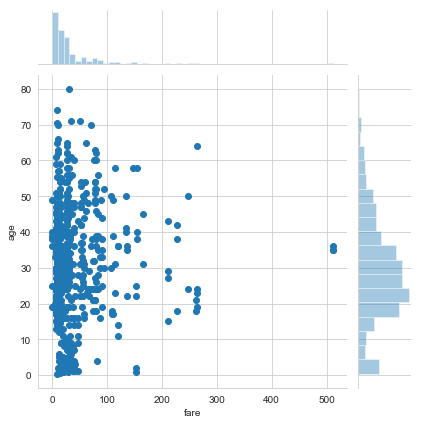

In [7]:
sb.jointplot(x='fare',y='age',data=data_titanic,kind='scatter')

Lots of passengers are in the low fare segments. Few paid more than 500.

## Boxplot

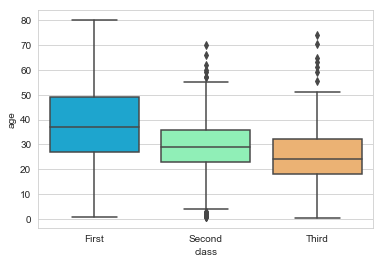

In [8]:
sb.boxplot(x='class',y='age',data=data_titanic,palette='rainbow')

Average age of passengers in first class are bigger than the average age of passengers in third class.

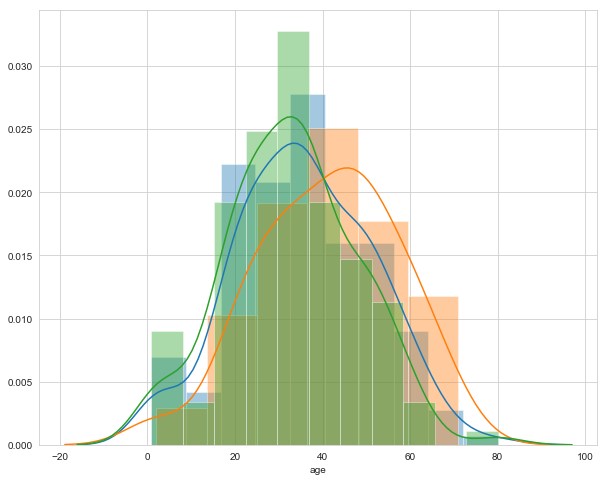

In [9]:
cln_df = data_titanic.dropna()
# Render
fig, ax = plt.subplots(1,1,figsize=(10,8))
sb.distplot(cln_df['age'],ax=ax,label='total')
sb.distplot(cln_df[cln_df.survived==0]['age'],ax=ax,label='survived=0')
sb.distplot(cln_df[cln_df.survived==1]['age'],ax=ax,label='survived=1')

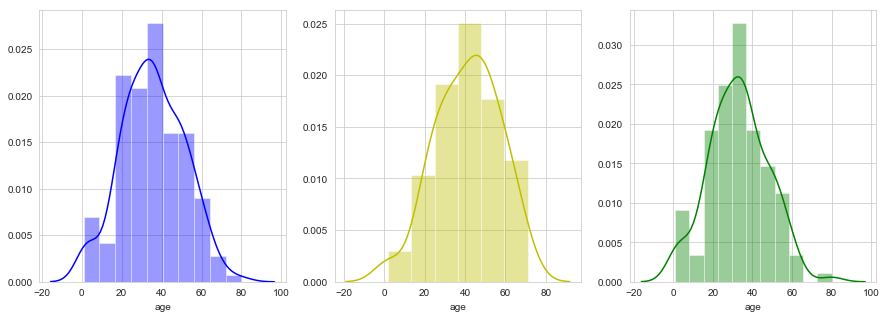

In [10]:
fig, ax = plt.subplots(1,3,figsize=(15,5))
sb.distplot(cln_df['age'],ax=ax[0],color='b')
sb.distplot(cln_df[cln_df.survived==0]['age'],ax=ax[1],color='y',label='survived=0')
sb.distplot(cln_df[cln_df.survived==1]['age'],ax=ax[2],color='g')

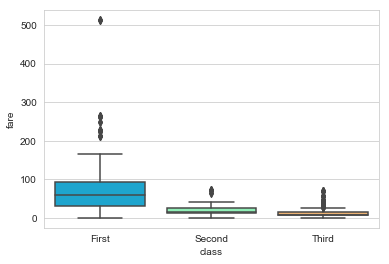

In [11]:
sb.boxplot(x='class',y='fare',data=data_titanic,palette='rainbow')

Let's look at the [correlation](https://en.wikipedia.org/wiki/Correlation_and_dependence) between variables.

In [12]:
data_titanic.corr()

,survived,pclass,age,sibsp,parch,fare,adult_male,alone
survived,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307,-0.557080,-0.203367
pclass,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500,0.094035,0.135207
age,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067,0.280328,0.198270
sibsp,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651,-0.253586,-0.584471
parch,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225,-0.349943,-0.583398
fare,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000,-0.182024,-0.271832
adult_male,-0.557080,0.094035,0.280328,-0.253586,-0.349943,-0.182024,1.000000,0.404744
alone,-0.203367,0.135207,0.198270,-0.584471,-0.583398,-0.271832,0.404744,1.000000


## Heatmap

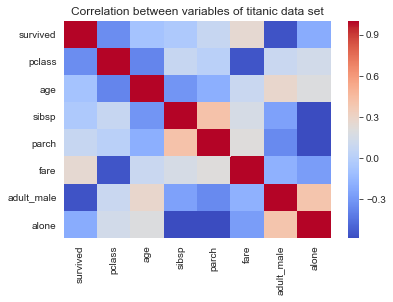

In [13]:
sb.heatmap(data_titanic.corr(),cmap='coolwarm')
plt.title('Correlation between variables of titanic data set')

Let's find out top pair of correlated variables.<br>
[<b>Reference</b>] See discussions in [Stackoverflow](https://stackoverflow.com/questions/17778394/list-highest-correlation-pairs-from-a-large-correlation-matrix-in-pandas) for the following code.

In [14]:
def get_redundant_pairs(df):
    '''Get diagonal and lower triangular pairs of correlation matrix'''
    pairs_to_drop = set()
    cols = df.columns
    for i in range(0, df.shape[1]):
        for j in range(0, i+1):
            pairs_to_drop.add((cols[i], cols[j]))
    return pairs_to_drop

def get_top_abs_correlations(df, n=5):
    au_corr = df.abs().unstack()
    labels_to_drop = get_redundant_pairs(df)
    au_corr = au_corr.drop(labels=labels_to_drop).sort_values(ascending=False)
    return au_corr[0:n]

print("\nTop Absolute Correlations\n")
print(get_top_abs_correlations(data_titanic.corr()))


Top Absolute Correlations

sibsp     alone         0.584471
parch     alone         0.583398
survived  adult_male    0.557080
pclass    fare          0.549500
sibsp     parch         0.414838
dtype: float64


## Barplot

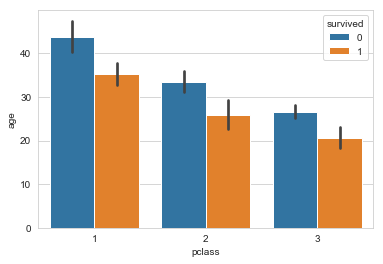

In [15]:
sb.barplot(x="pclass", y="age", hue="survived", data=data_titanic)

In [16]:
pclass_mean = data_titanic.groupby('pclass').mean()
pclass_mean

,survived,age,sibsp,parch,fare,adult_male,alone
pclass,,,,,,,
1,0.629630,38.233441,0.416667,0.356481,84.154687,0.550926,0.504630
2,0.472826,29.877630,0.402174,0.380435,20.662183,0.538043,0.565217
3,0.242363,25.140620,0.615071,0.393075,13.675550,0.649695,0.659878


Survival rate is negatively correlated with pclass. <br>


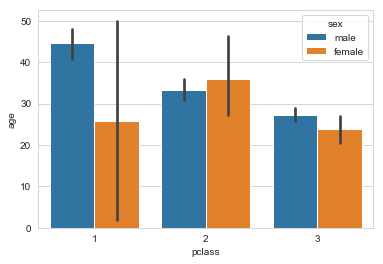

In [17]:
sb.barplot(x="pclass", y="age", hue="sex", data=data_titanic[(data_titanic.survived == 0)])

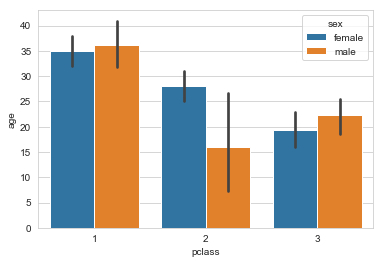

In [18]:
sb.barplot(x="pclass", y="age", hue="sex", data=data_titanic[(data_titanic.survived == 1)])

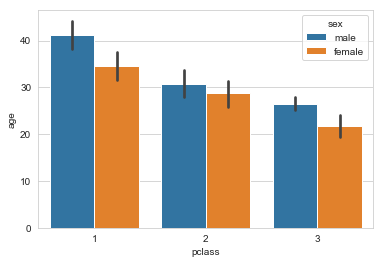

In [19]:
sb.barplot(x="pclass", y="age", hue="sex", data=data_titanic)

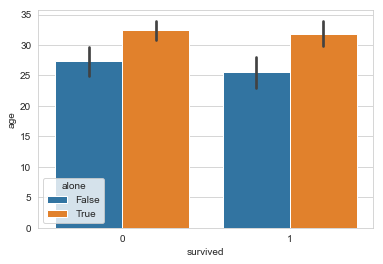

In [20]:
sb.barplot(x="survived", y='age', hue="alone", data=data_titanic)

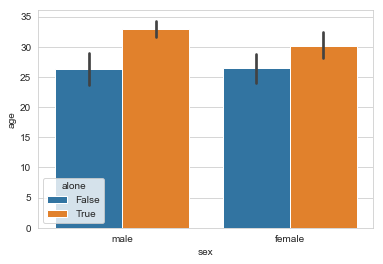

In [21]:
sb.barplot(x="sex", y='age', hue="alone", data=data_titanic)

## KDE Plot

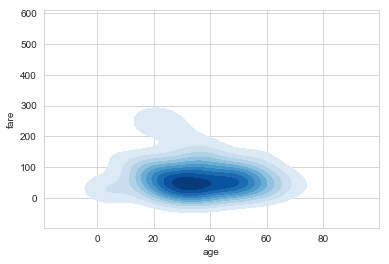

In [22]:
dd = data_titanic.dropna(how='any')
sb.kdeplot(dd.age, dd.fare,cmap="Blues", shade=True, shade_lowest=False)

## Violinplot

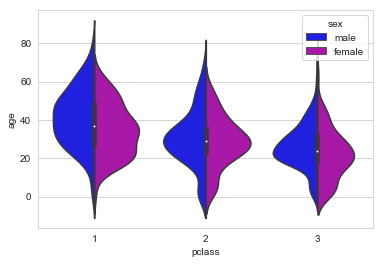

In [23]:
sb.violinplot(x='pclass', y='age', hue='sex', split=True, palette={'female': 'm', 'male': 'b'}, data=data_titanic)

Age distributions are different between genders. <br>
Males are older than females in each class.

## lmplot

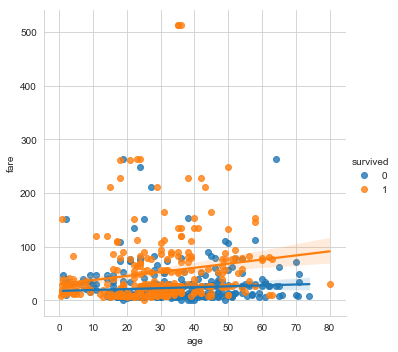

In [24]:
sb.lmplot(x="age", y="fare", hue="survived", truncate=True, height=5, data=data_titanic)

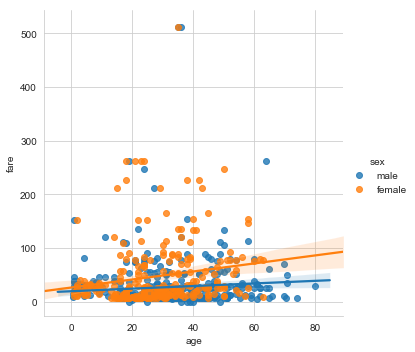

In [25]:
sb.lmplot(x="age", y="fare", hue="sex", data=data_titanic)

In [26]:
data_titanic[data_titanic.fare>400]

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
258,1,1,female,35.0,0,0,512.3292,C,First,woman,False,NaN,Cherbourg,yes,True
679,1,1,male,36.0,0,1,512.3292,C,First,man,True,B,Cherbourg,yes,False
737,1,1,male,35.0,0,0,512.3292,C,First,man,True,B,Cherbourg,yes,True


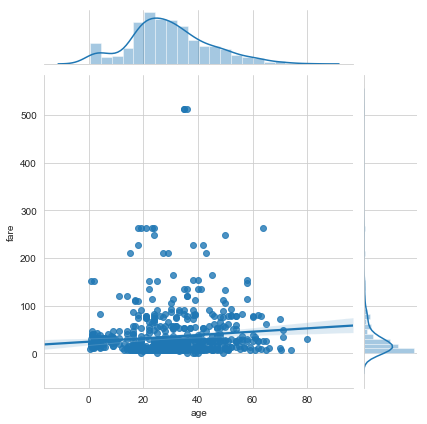

In [27]:
sb.jointplot("age", "fare", data=data_titanic, kind="reg")

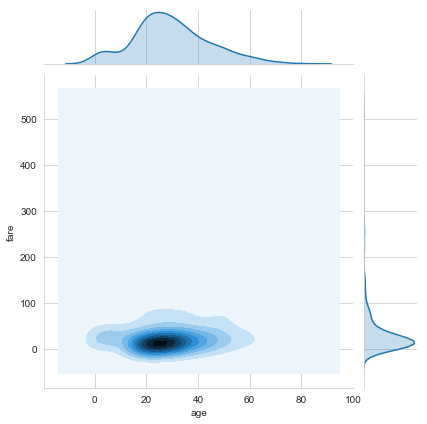

In [28]:
sb.jointplot("age", "fare", data=data_titanic, kind="kde")